In [ ]:
! pip3 install qiskit
! pip3 install pylatexenc

     |████████████████████████████████| 6.4 MB 4.9 MB/s 
     |████████████████████████████████| 18.0 MB 330 kB/s 
     |████████████████████████████████| 238 kB 59.5 MB/s 
     |████████████████████████████████| 200 kB 20.1 MB/s 
     |████████████████████████████████| 53 kB 880 kB/s 
     |████████████████████████████████| 1.6 MB 39.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 943 kB 43.8 MB/s 
     |████████████████████████████████| 38.2 MB 1.5 MB/s 
     |████████████████████████████████| 49 kB 5.1 MB/s 
     |████████████████████████████████| 3.6 MB 39.0 MB/s 
     |████████████████████████████████| 112 kB 42.7 MB/s 
  Created wheel for qiskit: filename=qiskit-0.34.1-py3-none-any.whl size=11771 sha256=2262954021ac06c1cad9cc36574505f5e03744bb31741183aaba7716d2e34b8c
  Stored in directory: /root/.cache/pip/wheels/79/b1/3f/8cdfd5543a84705e4bd16e081f2362b9b3bfd9898d2e2d

In [ ]:
import matplotlib.pyplot as plt
import pylatexenc
import numpy as np
import networkx as nx
from scipy.optimize import minimize
from qiskit import Aer
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

## Part I: MaxCut Problem

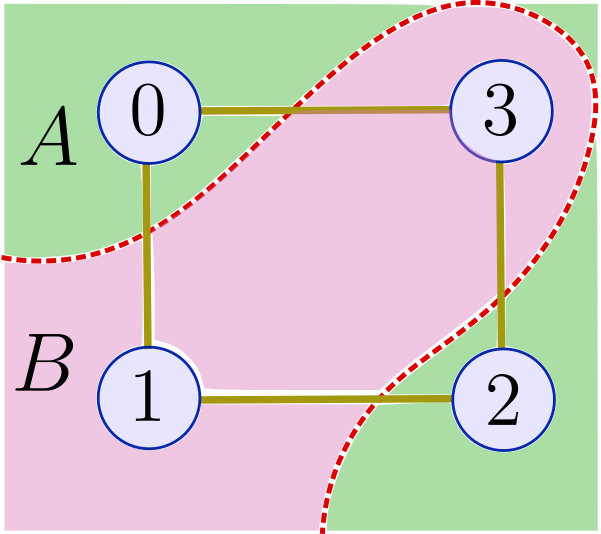

https://pennylane.ai/qml/demos/tutorial_qaoa_maxcut.html

The MaxCut problem is known to be an NP-complete problem. The QAOA algorithm developed by Farhi et.al. (2014) is a well-known heuristic that reduces computation time for MaxCut. Inspired by adiabiatic quantum computing, it seeks to find the lowest energy state of the Hamiltonian $H(t)=(1-t)H_i+tH_f$, where $H_i$ is the driver Hamiltonian and $H_f$ is the cost Hamiltonian.

## Part 2: QAOA

The adiabatic evolution $H(t)=(1-t)H_i+tH_f$ with driver Hamiltonian $H_i$ and cost Hamiltonian $H_f$ can be discretized into $P$ steps:

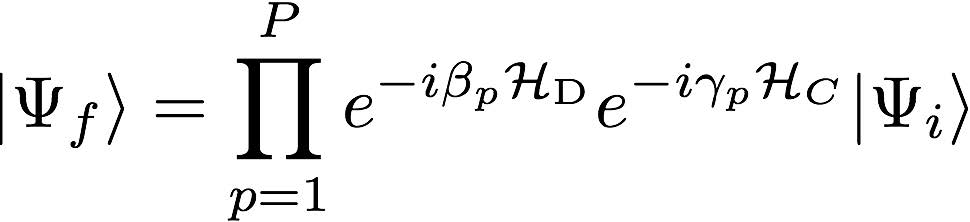

With $P$ successive applications of the cost and driver unitaries:
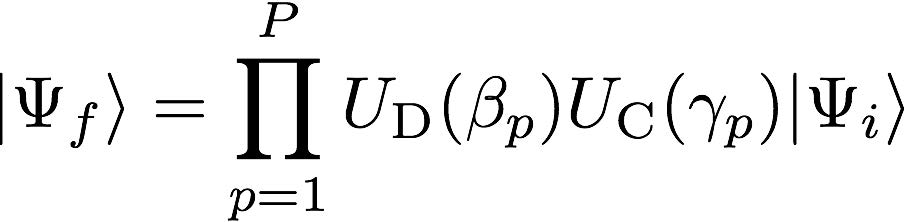

> Indented block



# Creating the QAOA Circuit

1) Prepare the initial state:

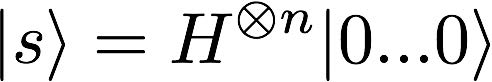

2) Apply the cost Hamiltonian:

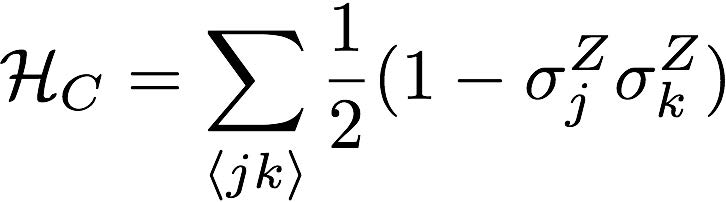


3) Apply the driver Hamiltonian:

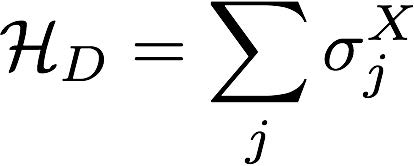

4) Exponentiate and parameterize the Ansatz in $P$ steps with $P$ betas and $P$ gammas:

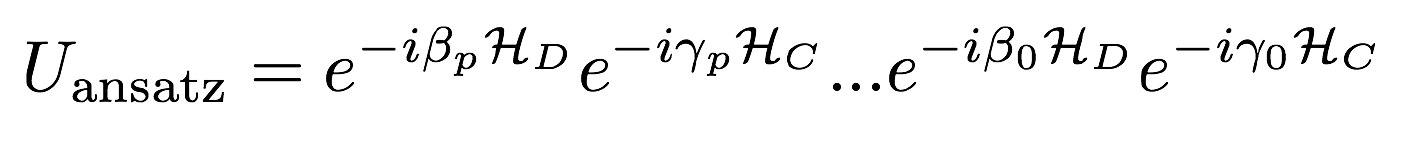

5) Then optimize over beta and gamma values:

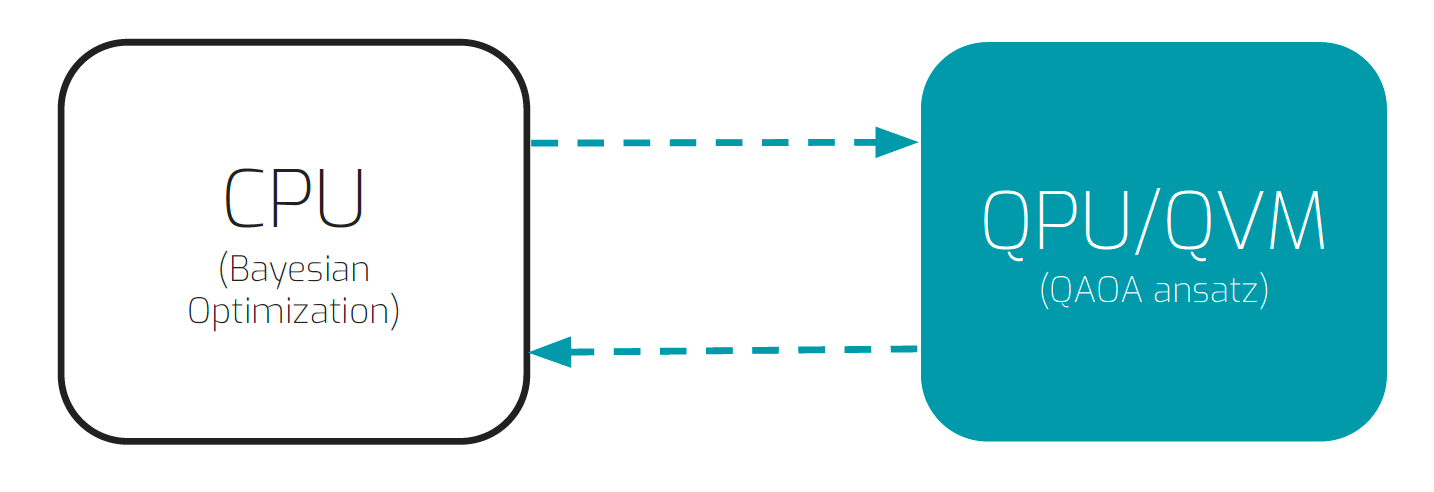

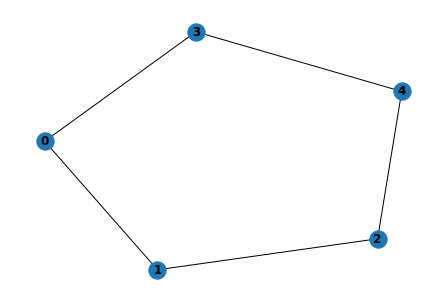

In [ ]:
Graph = nx.Graph()
Graph.add_edges_from([[0,1],[1,2],[0,3],[2,4],[3,4]])
nx.draw(Graph,with_labels=True,font_weight='bold')

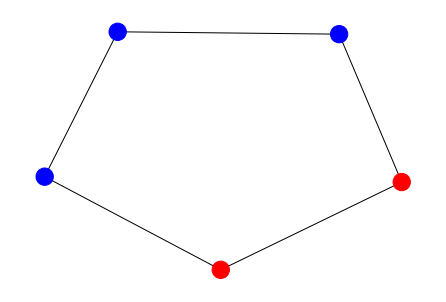

In [ ]:
nx.draw(Graph,node_color = ['r','b','b','r','b'])

In [ ]:
N = Graph.number_of_nodes() # The number of nodes in the graph
qc = QuantumCircuit(N,N) # Quantum circuit with N qubits and N classical register

gamma = np.pi/8 # parameter gamma for the cost function (maxcut hamiltonian)
#Apply the operator to each edge
for i, j in Graph.edges(): 
    qc.cx(i,j)
    qc.rz(2*gamma, j)
    qc.cx(i,j)
    qc.barrier()
    
qc.draw() # Draw the quantum circuit

░                       ░                       ░ »
q_0: ──■───────────────■───░───■───────────────■───░───────────────────────░─»
     ┌─┴─┐┌─────────┐┌─┴─┐ ░   │               │   ░                       ░ »
q_1: ┤ X ├┤ Rz(π/4) ├┤ X ├─░───┼───────────────┼───░───■───────────────■───░─»
     └───┘└─────────┘└───┘ ░   │               │   ░ ┌─┴─┐┌─────────┐┌─┴─┐ ░ »
q_2: ──────────────────────░───┼───────────────┼───░─┤ X ├┤ Rz(π/4) ├┤ X ├─░─»
                           ░ ┌─┴─┐┌─────────┐┌─┴─┐ ░ └───┘└─────────┘└───┘ ░ »
q_3: ──────────────────────░─┤ X ├┤ Rz(π/4) ├┤ X ├─░───────────────────────░─»
                           ░ └───┘└─────────┘└───┘ ░                       ░ »
q_4: ──────────────────────░───────────────────────░───────────────────────░─»
                           ░                       ░                       ░ »
c: 5/════════════════════════════════════════════════════════════════════════»
                                                                             »
«                           ░                       ░ 
«q_0: ──────────────────────░───────────────────────░─
«                           ░                       ░ 
«q_1: ──────────────────────░───────────────────────░─
«                           ░                       ░ 
«q_2: ──■───────────────■───░───────────────────────░─
«       │               │   ░                       ░ 
«q_3: ──┼───────────────┼───░───■───────────────■───░─
«     ┌─┴─┐┌─────────┐┌─┴─┐ ░ ┌─┴─┐┌─────────┐┌─┴─┐ ░ 
«q_4: ┤ X ├┤ Rz(π/4) ├┤ X ├─░─┤ X ├┤ Rz(π/4) ├┤ X ├─░─
«     └───┘└─────────┘└───┘ ░ └───┘└─────────┘└───┘ ░ 
«c: 5/════════════════════════════════════════════════
«

In [ ]:
beta = np.pi/8 # parameter for the driver hamiltonian
for n in Graph.nodes():
    qc.rx(2*beta, n)

# measure the result
qc.barrier(range(N))
qc.measure(range(N), range(N))

qc.draw(fold= 35) 

░      »
q_0: ──■───────────────■───░───■──»
     ┌─┴─┐┌─────────┐┌─┴─┐ ░   │  »
q_1: ┤ X ├┤ Rz(π/4) ├┤ X ├─░───┼──»
     └───┘└─────────┘└───┘ ░   │  »
q_2: ──────────────────────░───┼──»
                           ░ ┌─┴─┐»
q_3: ──────────────────────░─┤ X ├»
                           ░ └───┘»
q_4: ──────────────────────░──────»
                           ░      »
c: 5/═════════════════════════════»
                                  »
«                      ░      »
«q_0: ─────────────■───░──────»
«                  │   ░      »
«q_1: ─────────────┼───░───■──»
«                  │   ░ ┌─┴─┐»
«q_2: ─────────────┼───░─┤ X ├»
«     ┌─────────┐┌─┴─┐ ░ └───┘»
«q_3: ┤ Rz(π/4) ├┤ X ├─░──────»
«     └─────────┘└───┘ ░      »
«q_4: ─────────────────░──────»
«                      ░      »
«c: 5/════════════════════════»
«                             »
«                      ░      »
«q_0: ─────────────────░──────»
«                      ░      »
«q_1: ─────────────■───░──────»
«     ┌─────────┐┌─┴─┐ ░      »
«q_2: ┤ Rz(π/4) ├┤ X ├─░───■──»
«     └─────────┘└───┘ ░   │  »
«q_3: ─────────────────░───┼──»
«                      ░ ┌─┴─┐»
«q_4: ─────────────────░─┤ X ├»
«                      ░ └───┘»
«c: 5/════════════════════════»
«                             »
«                      ░      »
«q_0: ─────────────────░──────»
«                      ░      »
«q_1: ─────────────────░──────»
«                      ░      »
«q_2: ─────────────■───░──────»
«                  │   ░      »
«q_3: ─────────────┼───░───■──»
«     ┌─────────┐┌─┴─┐ ░ ┌─┴─┐»
«q_4: ┤ Rz(π/4) ├┤ X ├─░─┤ X ├»
«     └─────────┘└───┘ ░ └───┘»
«c: 5/════════════════════════»
«                             »
«                      ░ »
«q_0: ─────────────────░─»
«                      ░ »
«q_1: ─────────────────░─»
«                      ░ »
«q_2: ─────────────────░─»
«                      ░ »
«q_3: ─────────────■───░─»
«     ┌─────────┐┌─┴─┐ ░ »
«q_4: ┤ Rz(π/4) ├┤ X ├─░─»
«     └─────────┘└───┘ ░ »
«c: 5/═══════════════════»
«                        »
«     ┌─────────┐ ░ ┌─┐         »
«q_0: ┤ Rx(π/4) ├─░─┤M├─────────»
«     ├─────────┤ ░ └╥┘┌─┐      »
«q_1: ┤ Rx(π/4) ├─░──╫─┤M├──────»
«     ├─────────┤ ░  ║ └╥┘┌─┐   »
«q_2: ┤ Rx(π/4) ├─░──╫──╫─┤M├───»
«     ├─────────┤ ░  ║  ║ └╥┘┌─┐»
«q_3: ┤ Rx(π/4) ├─░──╫──╫──╫─┤M├»
«     ├─────────┤ ░  ║  ║  ║ └╥┘»
«q_4: ┤ Rx(π/4) ├─░──╫──╫──╫──╫─»
«     └─────────┘ ░  ║  ║  ║  ║ »
«c: 5/═══════════════╩══╩══╩══╩═»
«                    0  1  2  3 »
«        
«q_0: ───
«        
«q_1: ───
«        
«q_2: ───
«        
«q_3: ───
«     ┌─┐
«q_4: ┤M├
«     └╥┘
«c: 5/═╩═
«      4

# QAOA Circuit Implementation

In [ ]:
# Create the QAOA circuit with Maxcut and Driver Hamiltonians
def qaoa_circuit(G, theta,p):
    r"""
    ############################################
    # Compute the QAOA circuit for the graph G
    # G: graph
    # theta: parameters,first half is betas, second half is gammas
    # p: number of QAOA steps
    # return: The QAOA circuit 
    ###########################################
    """
    beta = theta[:p] # Parameters beta for the driver hamiltonian
    gamma = theta[p:] # Parameters gamma for the cost hamiltonian
    N = G.number_of_nodes() # Number of nodes of the graph G
    qc = QuantumCircuit(N, N) # Quantum circuit with N qubits and N classical register
    qc.h(range(N)) # Apply the Hadamard gate to all the qubits
    # Apply p operators
    for k in range(p):
        for i, j in G.edges(): # Representation of the cost hamiltonian
            qc.cx(i,j)  
            qc.rz(2*gamma[k], j)
            qc.cx(i,j)
            qc.barrier()
        for n in G.nodes(): # Representation of the driver hamiltonian
            qc.rx(2*beta[k], n)
    # Measurement in all the qubits
    qc.barrier(range(N))
    qc.measure(range(N), range(N))
    return qc #Returns the quantum circuit

In [ ]:
# p is the number of QAOA alternating operators
p = 1
theta = np.array([np.pi/8,np.pi/8])
circuit = qaoa_circuit(Graph, theta,p)

In [ ]:
circuit.draw(fold=35) # Draw the quantum circuit

┌───┐                      ░ »
q_0: ┤ H ├──■───────────────■───░─»
     ├───┤┌─┴─┐┌─────────┐┌─┴─┐ ░ »
q_1: ┤ H ├┤ X ├┤ Rz(π/4) ├┤ X ├─░─»
     ├───┤└───┘└─────────┘└───┘ ░ »
q_2: ┤ H ├──────────────────────░─»
     ├───┤                      ░ »
q_3: ┤ H ├──────────────────────░─»
     ├───┤                      ░ »
q_4: ┤ H ├──────────────────────░─»
     └───┘                      ░ »
c: 5/═════════════════════════════»
                                  »
«                           ░ »
«q_0: ──■───────────────■───░─»
«       │               │   ░ »
«q_1: ──┼───────────────┼───░─»
«       │               │   ░ »
«q_2: ──┼───────────────┼───░─»
«     ┌─┴─┐┌─────────┐┌─┴─┐ ░ »
«q_3: ┤ X ├┤ Rz(π/4) ├┤ X ├─░─»
«     └───┘└─────────┘└───┘ ░ »
«q_4: ──────────────────────░─»
«                           ░ »
«c: 5/════════════════════════»
«                             »
«                           ░ »
«q_0: ──────────────────────░─»
«                           ░ »
«q_1: ──■───────────────■───░─»
«     ┌─┴─┐┌─────────┐┌─┴─┐ ░ »
«q_2: ┤ X ├┤ Rz(π/4) ├┤ X ├─░─»
«     └───┘└─────────┘└───┘ ░ »
«q_3: ──────────────────────░─»
«                           ░ »
«q_4: ──────────────────────░─»
«                           ░ »
«c: 5/════════════════════════»
«                             »
«                           ░ »
«q_0: ──────────────────────░─»
«                           ░ »
«q_1: ──────────────────────░─»
«                           ░ »
«q_2: ──■───────────────■───░─»
«       │               │   ░ »
«q_3: ──┼───────────────┼───░─»
«     ┌─┴─┐┌─────────┐┌─┴─┐ ░ »
«q_4: ┤ X ├┤ Rz(π/4) ├┤ X ├─░─»
«     └───┘└─────────┘└───┘ ░ »
«c: 5/════════════════════════»
«                             »
«                           ░ »
«q_0: ──────────────────────░─»
«                           ░ »
«q_1: ──────────────────────░─»
«                           ░ »
«q_2: ──────────────────────░─»
«                           ░ »
«q_3: ──■───────────────■───░─»
«     ┌─┴─┐┌─────────┐┌─┴─┐ ░ »
«q_4: ┤ X ├┤ Rz(π/4) ├┤ X ├─░─»
«     └───┘└─────────┘└───┘ ░ »
«c: 5/════════════════════════»
«                             »
«     ┌─────────┐ ░ ┌─┐         »
«q_0: ┤ Rx(π/4) ├─░─┤M├─────────»
«     ├─────────┤ ░ └╥┘┌─┐      »
«q_1: ┤ Rx(π/4) ├─░──╫─┤M├──────»
«     ├─────────┤ ░  ║ └╥┘┌─┐   »
«q_2: ┤ Rx(π/4) ├─░──╫──╫─┤M├───»
«     ├─────────┤ ░  ║  ║ └╥┘┌─┐»
«q_3: ┤ Rx(π/4) ├─░──╫──╫──╫─┤M├»
«     ├─────────┤ ░  ║  ║  ║ └╥┘»
«q_4: ┤ Rx(π/4) ├─░──╫──╫──╫──╫─»
«     └─────────┘ ░  ║  ║  ║  ║ »
«c: 5/═══════════════╩══╩══╩══╩═»
«                    0  1  2  3 »
«        
«q_0: ───
«        
«q_1: ───
«        
«q_2: ───
«        
«q_3: ───
«     ┌─┐
«q_4: ┤M├
«     └╥┘
«c: 5/═╩═
«      4

In [ ]:
# Invert string for representation in Qiskit
def invert_counts(counts):
    r"""
    ############################################
    # Inverted the binary string
    #
    # counts: The result of running the quantum circuit
    # return: The results with binary string inverted
    ###########################################
    """
    inv_counts = {}
    for k, v in counts.items():
        inv_counts[k[::-1]] = v
    return inv_counts 

In [ ]:
def maxcut_objective_function(x,G):
    r"""
    ############################################
    # Compute the maxcut objective function for 
    # the binary string x and graph G
    # G: graph
    # x: binary string
    # return: The cost of the binary string x 
    ###########################################
    """
    cut = 0
    for i, j in G.edges():
        if x[i] != x[j]:
            cut -= 1# the edge is cut
    return cut # Sum of all the edges that are cut

In [ ]:
def function_to_minimize(G,p):
    r"""
    ############################################
    # Define the function to minimize given the 
    # graph G and the number of parameters
    # G: graph
    # p: number of parameters
    # return: The function to minimize
    ###########################################
    """
    backend = Aer.get_backend('qasm_simulator')
    def f(theta):
        r"""
        ############################################
        # Function that gives the energy for theta
        #
        # theta: parameters
        # return: Energy
        ###########################################
        """
        qc = qaoa_circuit(G, theta, p) 
        # Gives the QAOA circuit for graph G, parameters theta and p operators
        counts = execute(qc, backend, seed_simulator=10).result().get_counts() 
        # Run the circuit and get the results using the backend "qasm_simulator"
        
        E = 0 # Initial energy
        total_counts = 0 # Initial counts
        InvertedCounts = invert_counts(counts) 
        # Inverts the binary string (Qiskit uses least significant bit)
        # meas is the binary string measure
        # meas_count is the number of times that the binary string has been measure
        for meas, meas_count in InvertedCounts.items():
            objective_function = maxcut_objective_function(meas, G) 
            # Compute the maxcut objective function fot the binary string meas
            E += objective_function*meas_count 
            # Define the energy as the value of the objective functions times the counts of that measure
            total_counts += meas_count 
            # The total number of measures in the system
        return E/total_counts # Returns the energy given the parameters theta
    return f


In [ ]:
p = 5 # p is the number of QAOA alternating operators
objective_function = function_to_minimize(Graph, p)
x0 = np.random.randn(10) # Initial parameters

min_solution = minimize(objective_function, x0) 
# Minimization of scalar function 
min_solution

      fun: -1.068359375
 hess_inv: array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
      jac: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 11
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 1.65758073,  0.73837727, -1.1319297 ,  0.70819561,  0.46215485,
       -0.47634402, -0.03378239, -1.73995766,  1.1245904 , -0.83539672])

In [ ]:
optimal_theta = min_solution['x'] # The optimal parameters to use

In [ ]:
optimal_theta

array([ 1.65758073,  0.73837727, -1.1319297 ,  0.70819561,  0.46215485,
       -0.47634402, -0.03378239, -1.73995766,  1.1245904 , -0.83539672])

In [ ]:
backend = Aer.get_backend('qasm_simulator')
qc = qaoa_circuit(Graph, optimal_theta,p) 
# Define the quantum circuit with the optimal parameters
counts = invert_counts(execute(qc, backend).result().get_counts()) 
# Get the results

In [ ]:
# Compute the maxcut objective function for the optimal parameters
results = []
for x in counts.keys():
    results.append([maxcut_objective_function(x,Graph),x]) 

In [ ]:
# Get the best solution given the results of the maxcut objective function
best_cut, best_solution = min(results)
print(f"Best string: {best_solution} with cut: {-best_cut}")

Best string: 00110 with cut: 4


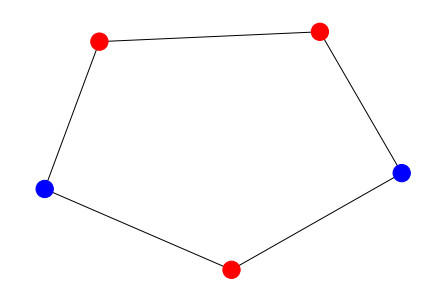

In [ ]:
# Define the colors of the nodes for the best solution
colors = ['r' if best_solution[node] == '0' else 'b' for node in Graph]
nx.draw(Graph,node_color = colors)

In [ ]:
def solution_max_cut(G):
    r"""
    ############################################
    # Compute the solution for the maxcut problem given a graph G
    #
    # G: graph
    # return:The draw of the best solution with two colors. Print the solution in the binary string form and the number of cuts 
    ###############
    """
    p = 5 # p is number of QAOA alternating operators (representing number of discretized steps)
    objective_function = function_to_minimize(G, p)
    x0 = np.random.randn(10) # Initial parameters

    new_parameters = minimize(objective_function, x0) # Minimization of scalar function 
    
    optimal_theta = new_parameters['x'] # The optimal parameters to use
    qc = qaoa_circuit(G, optimal_theta,p) # Define the quantum circuit with the optimal parameters
    counts = invert_counts(execute(qc, backend).result().get_counts()) # Get the results
    
    # Compute the maxcut objective function for the optimal parameters
    results = []
    for x in counts.keys():
        results.append([maxcut_objective_function(x,G),x])
        
    best_cut, best_solution = min(results) # Get the best solution given the results of the maxcut objective function
    colors = ['r' if best_solution[node] == '0' else 'b' for node in G] # Define the colors of the nodes for the best solution
    return nx.draw(G,node_color = colors),print(f"Best string: {best_solution} with cut: {-best_cut}")

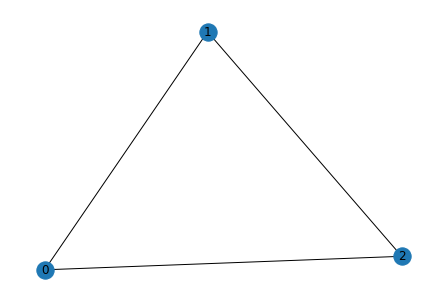

In [ ]:
graph1 = nx.Graph()
graph1.add_edges_from([[0,1], [0,2], [2,1]])
nx.draw(graph1, with_labels=True)

Best string: 001 with cut: 2


(None, None)

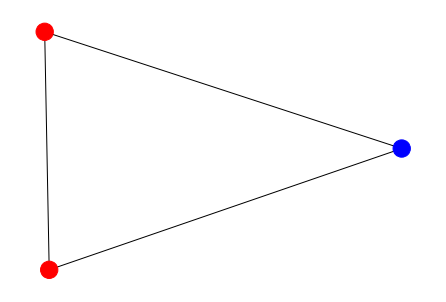

In [ ]:
solution_max_cut(graph1)

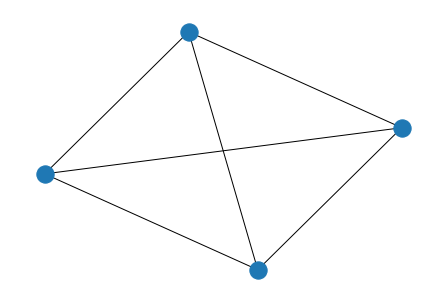

In [ ]:
graph2 = nx.random_regular_graph(3, 4, seed=1234)
nx.draw(graph2)          #drawing the graph
plt.show()              #plotting the graph

Best string: 0011 with cut: 4


(None, None)

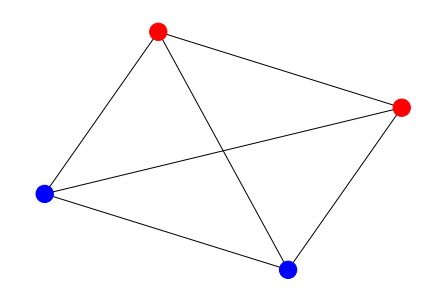

In [ ]:
solution_max_cut(graph2)

# Random Graph with 12 Nodes

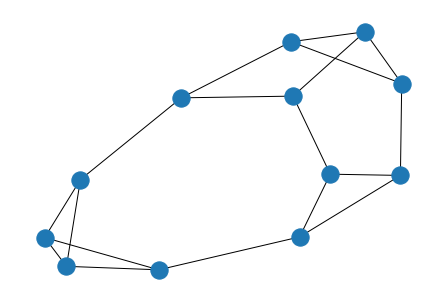

In [ ]:
graph3 = nx.random_regular_graph(3, 12, seed=1234)
nx.draw(graph3)          
# draw the graph
plt.show()              
# plot the graph

Best string: 010100110101 with cut: 14


(None, None)

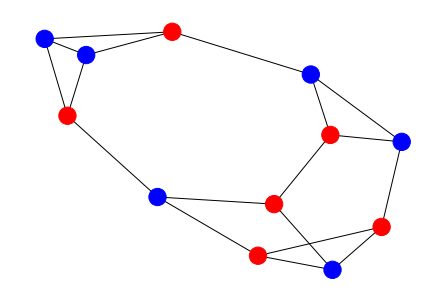

In [ ]:
solution_max_cut(graph3)

# Fully Connected Graph with 12 Nodes

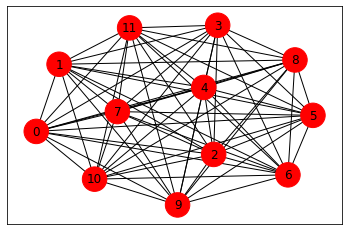

In [ ]:
# Generate a complete graph of 12 nodes
graph4 = nx.complete_graph(12)

# Generate plot of the Graph
colors       = ['r' for node in graph4.nodes()]
default_axes = plt.axes(frameon=True)
pos          = nx.spring_layout(graph4)

nx.draw_networkx(graph4, node_color=colors, node_size=600, alpha=1, ax=default_axes, pos=pos)

Best string: 000010011111 with cut: 36


(None, None)

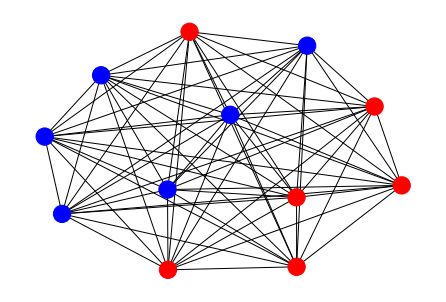

In [ ]:
solution_max_cut(graph4)

# References:

1) Santanu Ganguly, *Quantum Machine Learning: An Applied Approach*, Apress, 2021.

2) Santanu Pattanayak, *Quantum Machine Learning with Python*, Apress, 2021.

3) https://pennylane.ai/qml/demos/tutorial_qaoa_maxcut.html

4) https://www.mustythoughts.com/quantum-approximate-optimization-algorithm-explained

5) Edward Farhi, Jeffrey Goldstone, Sam Gutmann, "A Quantum Approximate Optimization Algorithm", https://arxiv.org/abs/1411.4028.

6) Zhihui Wang, Stuart Hadfield, Zhang Jiang, and Eleanor G. Rieffel, "Quantum Approximate Optimization Algorithm for MaxCut: A Fermionic View", https://arxiv.org/pdf/1706.02998.

